In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data = pd.read_csv('bioRXiv.csv')

In [31]:
data

,category,paperid,date,num_authors,title
0,ecology,847186,2019-11-20,4,Co-designed land-use scenarios and their impli...
1,ecology,847442,2019-11-20,5,Testing Darwin’s naturalization conundrum base...
2,ecology,373332,2019-11-20,4,The taxonomic and functional biogeographies of...
3,ecology,718239,2019-11-20,113,Genetic tool development in marine protists: E...
4,ecology,848564,2019-11-19,3,Preference and switching in the Kill-the-Winne...
...,...,...,...,...,...
3049,ecology,281337,2018-03-13,1,Landscape-level DNA metabarcoding study in the...
3050,ecology,281584,2018-03-13,7,Accounting for location uncertainty in azimuth...
3051,ecology,281014,2018-03-12,3,Mitigation of coral bleaching by antioxidants
3052,ecology,279562,2018-03-12,7,A microcalorimetric approach for investigating...


1. Document the change in number of submissions: plot the number of submission per week for each year, and check whether it's growing.

In [38]:
# transform to datetime
data.date = pd.to_datetime(data.date)
# extract year
data['year'] = pd.DatetimeIndex(data['date']).year
# extract month
data['month'] = pd.DatetimeIndex(data['date']).month
# extract day of the week
data['weekday'] = pd.DatetimeIndex(data['date']).dayofweek

In [39]:
data

,category,paperid,date,num_authors,title,year,month,weekday
0,ecology,847186,2019-11-20,4,Co-designed land-use scenarios and their impli...,2019,11,2
1,ecology,847442,2019-11-20,5,Testing Darwin’s naturalization conundrum base...,2019,11,2
2,ecology,373332,2019-11-20,4,The taxonomic and functional biogeographies of...,2019,11,2
3,ecology,718239,2019-11-20,113,Genetic tool development in marine protists: E...,2019,11,2
4,ecology,848564,2019-11-19,3,Preference and switching in the Kill-the-Winne...,2019,11,1
...,...,...,...,...,...,...,...,...
3049,ecology,281337,2018-03-13,1,Landscape-level DNA metabarcoding study in the...,2018,3,1
3050,ecology,281584,2018-03-13,7,Accounting for location uncertainty in azimuth...,2018,3,1
3051,ecology,281014,2018-03-12,3,Mitigation of coral bleaching by antioxidants,2018,3,0
3052,ecology,279562,2018-03-12,7,A microcalorimetric approach for investigating...,2018,3,0


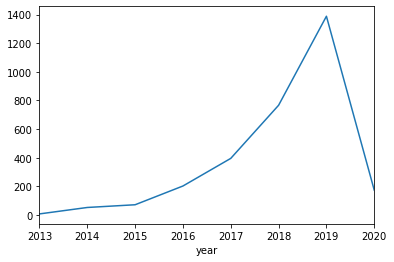

In [42]:
# plot number of submissions per year
plt.figure()
# this creates a Series
s_per_year = data.groupby('year').size()
s_per_year.plot()

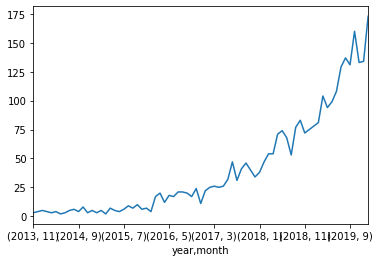

In [43]:
# now by month and year
plt.figure()
# this creates a Series
s_per_mo_year = data.groupby(['year', 'month']).size()
s_per_mo_year.plot()

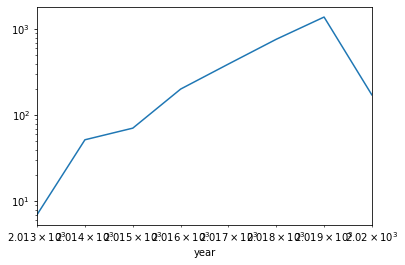

In [47]:
# if this was exponential growth, in log it should be a line
s_per_year.plot(loglog = True)

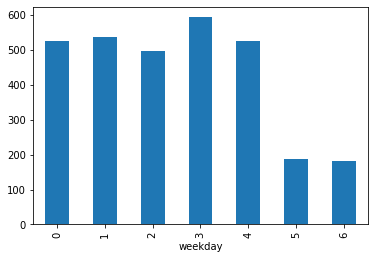

In [51]:
# which day is the one with most submissions?
s_per_weekday = data.groupby('weekday').size()
s_per_weekday.plot.bar()

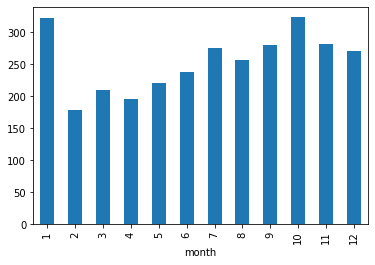

In [52]:
# which month is the one with most submissions?
s_per_month = data.groupby('month').size()
s_per_month.plot.bar()

2. Draw the distribution of the number of authors in the *Subject Area*. If people choose different areas, we can see whether different disciplines have different cultures.

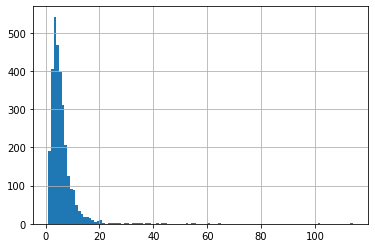

In [53]:
plt.figure()
data['num_authors'].hist(bins = bins)

(array([2.876e+03, 1.450e+02, 1.600e+01, 1.000e+01, 3.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  0. ,  11.3,  22.6,  33.9,  45.2,  56.5,  67.8,  79.1,  90.4,
        101.7, 113. ]),
 <a list of 10 Patch objects>)

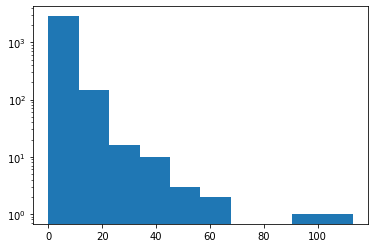

In [56]:
# very skewed distribution; try to plot in log
plt.hist(data['num_authors'], log = 'xy')

In [62]:
# see whether mean and median have changed
trend_num_auth = data.groupby('year')['num_authors'].agg(mean_na = 'mean',
                                                         median_na= 'median',
                                                         sd_na = 'std')

In [63]:
trend_num_auth

,mean_na,median_na,sd_na
year,,,
2013,3.857143,2,3.236694
2014,4.115385,3,2.941614
2015,4.295775,3,3.841110
2016,4.797030,4,4.381484
2017,5.331646,4,5.208241
2018,5.349869,4,4.723220
2019,5.603746,5,5.965417
2020,5.867052,5,3.859406


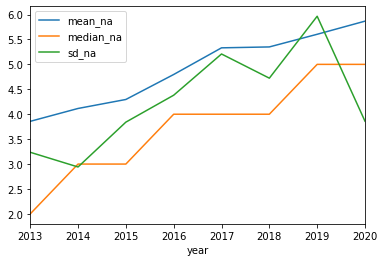

In [64]:
trend_num_auth.plot()